In [1]:
# Import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Estamos utilizando um dataset que contém dados de consumo de energia elétrica de Tetouan City em Marrocos

Neste dataset nossa variável target será o consumo de energia na zona1

# **1 - Data Prep**

In [2]:
raw_data = pd.read_csv('powerconsumption.csv', index_col='Datetime').drop_duplicates()
raw_data.head(10)

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
1/1/2017 0:50,5.853,76.9,0.081,0.059,0.108,26624.81013,17416.41337,18130.12048
1/1/2017 1:00,5.641,77.7,0.080,0.048,0.096,25998.98734,16993.31307,17945.06024
1/1/2017 1:10,5.496,78.2,0.085,0.055,0.093,25446.07595,16661.39818,17459.27711
1/1/2017 1:20,5.678,78.1,0.081,0.066,0.141,24777.72152,16227.35562,17025.54217


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52416 entries, 1/1/2017 0:00 to 12/30/2017 23:50
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
 6   PowerConsumption_Zone2  52416 non-null  float64
 7   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8)
memory usage: 5.6+ MB


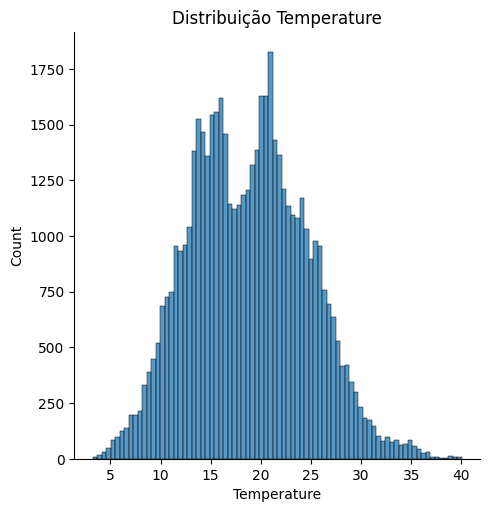

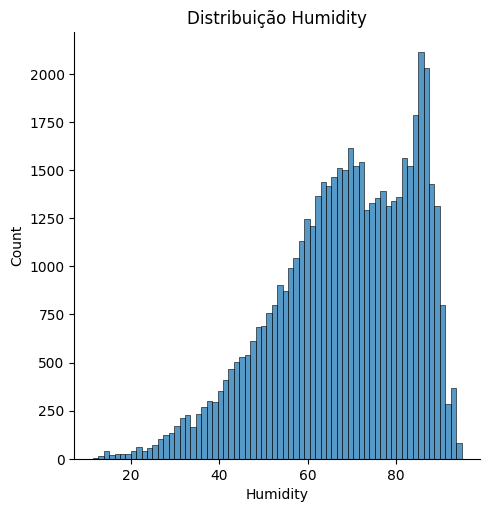

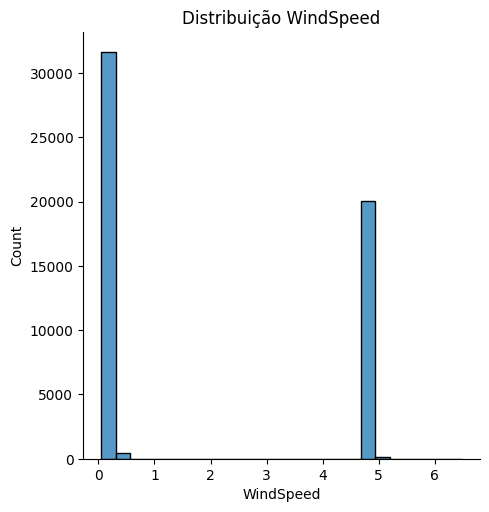

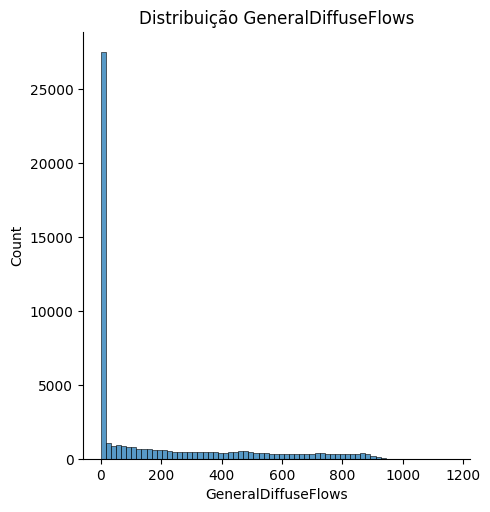

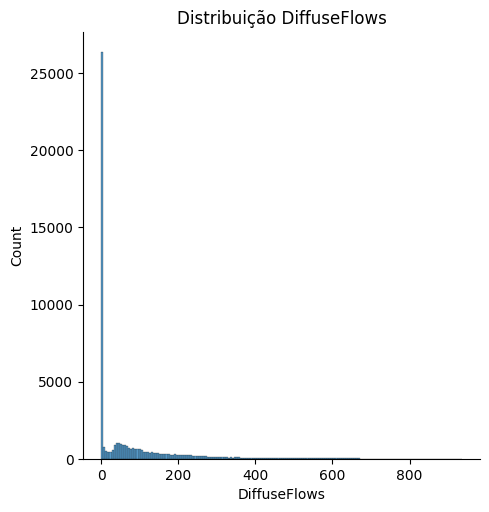

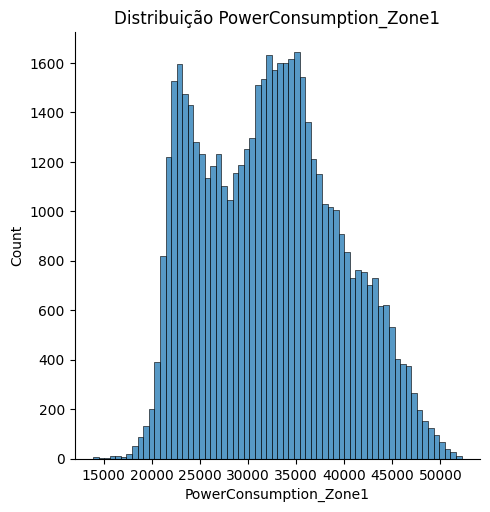

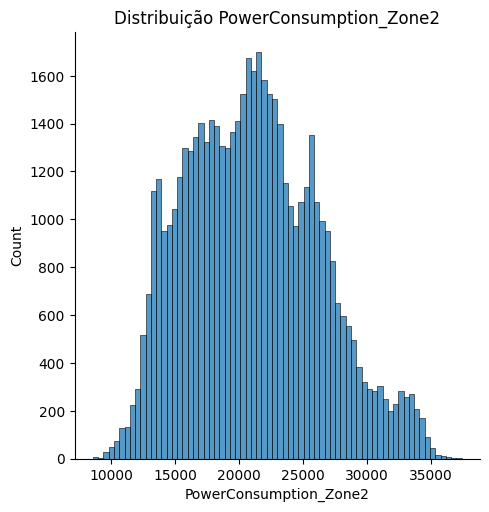

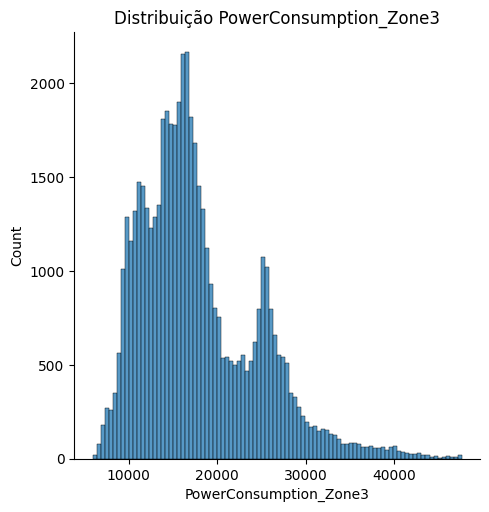

In [4]:
# Gráfico de distribuição

# Itera por cada coluna do dataset
for c in raw_data.columns:
    # Para cada coluna, plota um gráfico de distribuição
    sns.displot(raw_data[c], kde=False)
    
    # Adiciona título
    plt.title(f'Distribuição {c}')

    # Exibe o gráfico
    plt.show()

### Encoding

Neste dataset não há necessidade visto que não temos dados do tipo string. Todos os dados são do tipo float

### Matriz de correlação

<Axes: >

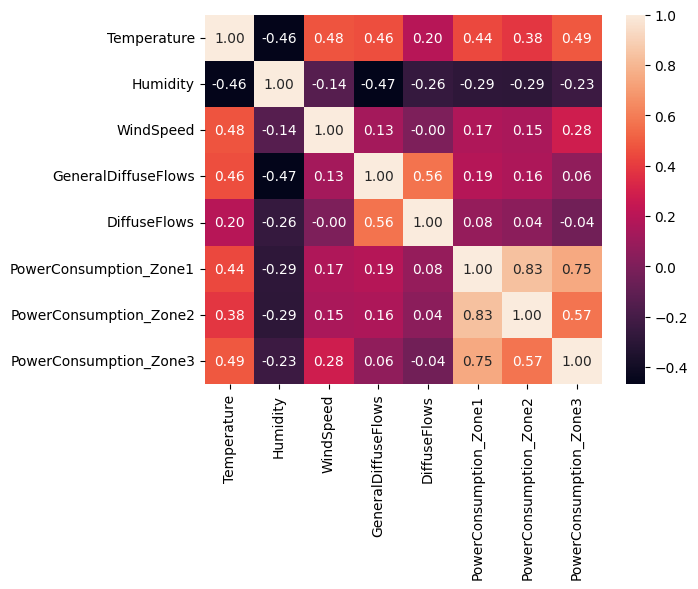

In [5]:
sns.heatmap(raw_data.corr(), annot=True, fmt='.2f')

### Pandas profiling

In [6]:
'''from ydata_profiling import ProfileReport
ProfileReport(raw_data).to_file('energy_consumption.html')'''

"from ydata_profiling import ProfileReport\nProfileReport(raw_data).to_file('energy_consumption.html')"

### Data Split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(raw_data.drop(columns='PowerConsumption_Zone1'),
                                                    raw_data['PowerConsumption_Zone1'], test_size=0.2, random_state=42)

### Scaling

In [8]:
# Importa a biblioteca de scaling do sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Aplica o scaling nos dados treino e teste
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Cria df dos dados de treino e teste com scaling
x_train_final = pd.DataFrame(x_train_scaled, columns=x_train.columns, index=x_train.index)
x_test_final = pd.DataFrame(x_test_scaled, columns=x_test.columns, index=x_test.index)

# **2 - Criação do modelo**

In [9]:
# Importa o modelo Linear Regression
from sklearn.linear_model import LinearRegression

# Cria a classe LinearRegression
linear_regression = LinearRegression()

# Treina o modelo
linear_regression.fit(x_train_final, y_train)

# Preve os resultados
y_pred_lr = linear_regression.predict(x_test_final)

In [10]:
# Coeficientes da regressão
coef_df = pd.DataFrame(linear_regression.coef_, x_train_final.columns, columns=['Coef'])
coef_df

,Coef
Temperature,-8.878637
Humidity,68.056844
WindSpeed,-83.754421
GeneralDiffuseFlows,189.524615
DiffuseFlows,225.436065
PowerConsumption_Zone2,2332.754762
PowerConsumption_Zone3,1926.407170


In [11]:
# Dataframe dados observados x previstos
df = pd.DataFrame({'Real Values': y_test, 'Predict Values': y_pred_lr})
df.head(10)

,Real Values,Predict Values
Datetime,,
4/18/2017 16:20,32985.14532,32961.507780
12/27/2017 17:10,34737.64259,37585.426375
1/2/2017 11:20,27894.68354,31948.754504
3/19/2017 20:20,42476.93617,37609.242669
4/24/2017 5:50,21341.14101,22000.344388
1/9/2017 2:10,22043.54430,24388.086422
2/4/2017 11:00,32509.83051,29520.046721
5/30/2017 5:30,21390.68852,21979.670574
12/10/2017 17:50,37286.69202,39044.936988


# **3 - Avaliação do modelo**

In [12]:
# R-Quadrado
from sklearn.metrics import r2_score

r2_lr = r2_score(y_test, y_pred_lr)
print(f'O modelo de Linear Regression nos deu um R² de {r2_lr}')

O modelo de Linear Regression nos deu um R² de 0.8157555926434139


In [13]:
# R² ajustado
def adjusted_r2(y_test, y_pred_lr, x_train_final):
    
  from sklearn.metrics import r2_score

  adj_r2 = (1 - ((1 - r2_score(y_test, y_pred_lr)) * (len(y_test) - 1)) / 
          (len(y_test) - x_train_final.shape[1] - 1))
    
  return adj_r2

adjusted_r2(y_test, y_pred_lr, x_train_final)

0.8156324816419347

In [14]:
# Erro Quadrático Médio
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error

mse = mean_squared_error(y_test, y_pred_lr)
rmse = root_mean_squared_error(y_test, y_pred_lr)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 9303308.29814853
RMSE: 3050.13250501491


In [15]:
# Erro Absoluto Médio
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred_lr)

print(f'MAE: {mae}')

MAE: 2466.1799571483843


In [16]:
# Erro Percentual Absoluto Médio (MAPE)
MAPE = np.mean(np.abs((y_test - y_pred_lr) / y_test)) * 100

print(f"Valor do MAPE dado em percentual: {MAPE}")

Valor do MAPE dado em percentual: 7.589801930676286


In [17]:
# Cálcula os resíduos
residuos = y_test - y_pred_lr
residuos.tail(10)

Datetime
7/6/2017 16:50      3513.589699
7/7/2017 16:20     -3285.542271
7/30/2017 6:10     -1741.364301
5/2/2017 3:40      -1241.464298
11/17/2017 14:00   -5308.305798
3/10/2017 6:20     -1730.713441
10/29/2017 13:00    -280.419022
5/4/2017 21:30      3820.264626
9/22/2017 2:20      3650.974933
8/4/2017 10:00     -5718.337120
Name: PowerConsumption_Zone1, dtype: float64

# **4 - Cross-validation**

A validação cruzada é importante em Python, assim como em qualquer outra linguagem de programação, porque nos permite avaliar a capacidade preditiva de um modelo de machine learning de forma mais precisa. Ao realizar a validação cruzada, estamos simulando como o modelo irá se comportar em dados não vistos, o que é essencial para verificar se ele é capaz de generalizar para novos exemplos.

A validação cruzada também nos ajuda a identificar possíveis problemas de overfitting, que ocorrem quando um modelo se ajusta muito bem aos dados de treinamento, mas apresenta um desempenho ruim em dados não vistos. Ao realizar a validação cruzada, podemos observar se o modelo está generalizando adequadamente ou se está tendo dificuldade em se adaptar a diferentes conjuntos de dados.

In [18]:
from sklearn.model_selection import cross_val_score
cv_lr = cross_val_score(linear_regression, x_train_final, y_train, cv=8, scoring='r2')
cv_lr

array([0.82261625, 0.82101218, 0.81574315, 0.81437666, 0.8187721 ,
       0.81541408, 0.80406641, 0.81627022])